<a href="https://www.kaggle.com/code/hilalalpak/movielens-recommendation-systems?scriptVersionId=183561056" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="text-align:center;">
    <img src="https://m.media-amazon.com/images/I/612-SU7gJZL.png" alt="612-SU7gJZL.png" style="max-width:70px;">
</div>


<div style="color: #ffffff; border-radius: 0 50px 0 20px; background-color:#FFA500; padding:2px; margin-bottom: 5px;">
    <blockquote style="border-left: 5px solid #FFA500;"> 
    <p style="margin: 0; font-size: 25px; text-align: center; font-family:Helvetica Neue; font-weight: bold; letter-spacing: 2px;">Recommendation Systems</p>  
    </blockquote>
</div>


<div style="display:inline-block; text-align:left; margin-bottom:10px;">
    <div style="border: 2px solid #333333; border-radius: 0 50px 0 0; padding: 10px; margin-bottom: 10px; background-color: #2f3c54;">
        <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;">
            <p style="font-weight:bold; color:white; margin:0; font-size: 140%;font-family: Arial, sans-serif">Business Problem: Developing a Recommendation System for Film Industry</p>
        </blockquote>
        <div style="margin-bottom: 10px;">
            <p style="color:white; font-size: 100%; font-family: Arial, sans-serif; margin-top:5px;">The film industry requires recommendation systems to provide viewers with engaging and personalized content. These systems recommend the most suitable films to users based on their preferences and past viewing habits. This project aims to make 10 film recommendations using item-based and user-based recommender methods for a specific user.
            </p>
        </div>
        <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
            <span style="font-weight:bold; font-size: 100%; color:white;">Dataset Overview: </span>
            <span style="color:white;">The dataset has been provided by MovieLens, a movie recommendation service. It contains ratings for 27,278 movies, totaling 2,000,263 ratings. The dataset was created on October 17, 2016, and it includes data from 138,493 users. These users' data spans from January 9, 1995, to March 31, 2015. The dataset indicates that all selected users have rated at least 20 movies.</span>
        </blockquote> 
        <div style="border: 2px solid #333333; border-radius: 0 50px 0 0; padding: 10px; margin-bottom: 10px; background-color:#414F74;">
            <div style="margin-bottom: 10px;">
                <span style="font-weight:bold; color:white;">- movieId:</span>
                <span style="color:white;">Unique movie number</span>
            </div>
            <div style="margin-bottom: 10px;">
                <span style="font-weight:bold; color:white;">- title:</span>
                <span style="color:white;">Movie name</span>
            <div style="margin-bottom: 10px;">
                </div>
                <span style="font-weight:bold; color:white;">- genres:</span>
                <span style="color:white;">Genre</span>
            </div>
            <div style="margin-bottom: 10px;">
                <span style="font-weight:bold; color:white;">- userId:</span>
                <span style="color:white;">Unique user number.</span>
            </div>
                <div style="margin-bottom: 10px;">
                <span style="font-weight:bold; color:white;">- rating:</span>
                <span style="color:white;">Rating given to the movie by the user</span>
            </div>
                <div style="margin-bottom: 10px;">
                <span style="font-weight:bold; color:white;">- timestamp:</span>
                <span style="color:white;">Rating timestamp</span>
            </div>
        </div>
    </div>
</div>


<div style="text-align:center; font-size:20px; border: 2px solid #669FCC; border-radius: 5px; padding: 8px; margin-bottom: 10px; background-color:white ; font-family: Helvetica Neue; font-weight: bold; color: #414F74;">Preparation of the Dataset
</div>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Import Required Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Adjusting Row Column Settings

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)

In [2]:
# import datasets and look at columns

movie = pd.read_csv("/kaggle/input/movielens/movie.csv")
rating = pd.read_csv("/kaggle/input/movielens/rating.csv")

# overview of datasets

print("MOVIE".center(80,"-"))
movie.head(10)
print("RATING".center(80,"-"))
rating.head(10)

-------------------------------------MOVIE--------------------------------------


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


-------------------------------------RATING-------------------------------------


,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
5,1,112,3.5,2004-09-10 03:09:00
6,1,151,4.0,2004-09-10 03:08:54
7,1,223,4.0,2005-04-02 23:46:13
8,1,253,4.0,2005-04-02 23:35:40
9,1,260,4.0,2005-04-02 23:33:46


In [3]:
# The code merges the DataFrames movie and rating using the common column "movieId"
# The `how="left"` parameter keeps all rows from the left DataFrame and adds only matching rows from the right DataFrame

df = movie.merge(rating, how="left", on="movieId")
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.5,2009-01-02 01:13:41


In [4]:
def check_df(dataframe, head=5):
    print("SHAPE".center(70,"-"))
    print(dataframe.shape)
    print("INFO".center(70,"-"))
    print(dataframe.info())
    print("MEMORY USAGE".center(70,"-"))
    print(f"{dataframe.memory_usage().sum() / (1024**2):.2f} MB")
    print("NUNIQUE".center(70,"-"))
    print(dataframe.nunique())
    print("MISSING VALUES".center(70,"-"))
    print(dataframe.isnull().sum())
    print("DUPLICATED VALUES".center(70,"-"))
    print(dataframe.duplicated().sum())
    
    
check_df(df)

--------------------------------SHAPE---------------------------------
(20000797, 6)
---------------------------------INFO---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000797 entries, 0 to 20000796
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   title      object 
 2   genres     object 
 3   userId     float64
 4   rating     float64
 5   timestamp  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 915.6+ MB
None
-----------------------------MEMORY USAGE-----------------------------
915.56 MB
-------------------------------NUNIQUE--------------------------------
movieId         27278
title           27262
genres           1342
userId         138493
rating             10
timestamp    15351121
dtype: int64
----------------------------MISSING VALUES----------------------------
movieId        0
title          0
genres         0
userId       534
rating       534
timestamp    534

In [5]:
percentiles = [0.10, 0.25, 0.80, 0.90, 0.95, 0.99]
df.groupby("movieId").agg({"rating": "count"}).describe(percentiles = percentiles).T

,count,mean,std,min,10%,25%,50%,80%,90%,95%,99%,max
rating,27278.0,733.201224,3057.219626,0.0,1.0,3.0,16.0,332.0,1265.0,3539.15,14297.45,67310.0


<div style="background-color:#808080; border-radius: 20px; padding: 5px; margin-bottom: 6px; text-align: right;">
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 14px; text-align: left; font-family: 'Arial', sans-serif; letter-spacing: 1px; color: white;">The average is 747, but the standard deviation is quite high (3085). This indicates that the number of ratings per film varies greatly.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 14px; text-align: left; font-family: 'Arial', sans-serif; letter-spacing: 1px; color:white;">Every film has received at least one rating.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 14px; text-align: left; font-family: 'Arial', sans-serif; letter-spacing: 1px; color:white;">These results indicate that the distribution of ratings per film is quite diverse, with some films receiving very few ratings and others receiving a significant number.</p>
    </blockquote>
</div>

<div style="text-align:center; font-size:20px; border: 2px solid #669FCC; border-radius: 5px; padding: 8px; margin-bottom: 10px; background-color:white; font-family: Helvetica Neue; font-weight: bold; color: #414F74;">Item-Based Collaborative Filtering
</div>

In [6]:
# The number of ratings for each movie

rate_count = pd.DataFrame(df["title"].value_counts()).reset_index()
rate_count

,title,count
0,Pulp Fiction (1994),67310
1,Forrest Gump (1994),66172
2,"Shawshank Redemption, The (1994)",63366
3,"Silence of the Lambs, The (1991)",63299
4,Jurassic Park (1993),59715
...,...,...
27257,Tom and Jerry: A Nutcracker Tale (2007),1
27258,Kleines Arschloch - Der Film (1997),1
27259,Manta - Der Film (1991),1
27260,Girls on Top (2001),1


<div style="background-color:#414F74; border-radius: 20px; padding: 5px; margin-bottom: 6px; text-align: right;">
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 14px; text-align: left; font-family: 'Arial', sans-serif; letter-spacing: 1px; color: white;">Films with low rating counts are not considered both in terms of computational costs and business decisions.
Movies with low ratings are not considered both for computational cost reasons and business decision-making.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 14px; text-align: left; font-family: 'Arial', sans-serif; letter-spacing: 1px; color: white;">Balanced the analyses by excluding rare films and setting the threshold at 1500 ratings, aligning with the 90th percentile, to focus on more common and representative data.</p>
    </blockquote>
</div>

In [7]:
rare = rate_count[rate_count["count"] <= 1500]["title"].tolist()

common_df = df[~df['title'].isin(rare)]
common_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.5,2009-01-02 01:13:41
...,...,...,...,...,...,...
19985698,114240,Aladdin (1992),Adventure|Animation|Children|Comedy|Fantasy,28195.0,4.0,2014-09-22 20:52:18
19985699,114240,Aladdin (1992),Adventure|Animation|Children|Comedy|Fantasy,51334.0,3.0,2014-09-23 15:53:39
19985700,114240,Aladdin (1992),Adventure|Animation|Children|Comedy|Fantasy,120575.0,2.5,2014-10-08 14:23:39
19985701,114240,Aladdin (1992),Adventure|Animation|Children|Comedy|Fantasy,124998.0,2.5,2014-09-20 22:16:14


In [8]:
# First dataset
print(f"First Data Movies : {df['title'].nunique()}")
print(f"First Data Shape : {df.shape[0]}")

# Filtered dataset
print(f"Latest Data Movies : {common_df['title'].nunique()}")
print(f"Latest Data Shape : {common_df.shape[0]}")

First Data Movies : 27262
First Data Shape : 20000797
Latest Data Movies : 2449
Latest Data Shape : 16895834


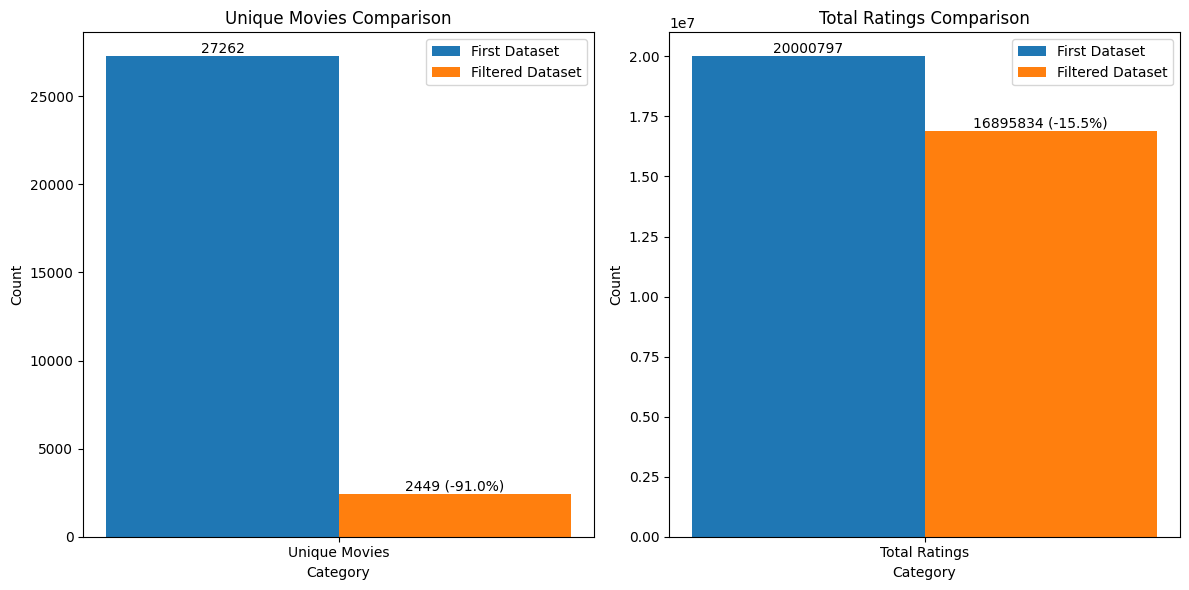

In [9]:
categories = ['Unique Movies', 'Total Ratings']
first_dataset = [df['title'].nunique(), df.shape[0]]
filtered_dataset = [common_df['title'].nunique(), common_df.shape[0]]

percent_change_movies = ((filtered_dataset[0] - first_dataset[0]) / first_dataset[0]) * 100
percent_change_ratings = ((filtered_dataset[1] - first_dataset[1]) / first_dataset[1]) * 100

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

bar_width = 0.35
index = range(1)

bars1 = axs[0].bar(index, first_dataset[0], bar_width, label='First Dataset')
bars2 = axs[0].bar([i + bar_width for i in index], filtered_dataset[0], bar_width, label='Filtered Dataset')

axs[0].text(index[0], first_dataset[0], f'{first_dataset[0]}', ha='center', va='bottom')
axs[0].text(index[0] + bar_width, filtered_dataset[0], f'{filtered_dataset[0]} ({percent_change_movies:.1f}%)', ha='center', va='bottom')

axs[0].set_xlabel('Category')
axs[0].set_ylabel('Count')
axs[0].set_title('Unique Movies Comparison')
axs[0].set_xticks([i + bar_width / 2 for i in index])
axs[0].set_xticklabels(['Unique Movies'])
axs[0].legend()

bars3 = axs[1].bar(index, first_dataset[1], bar_width, label='First Dataset')
bars4 = axs[1].bar([i + bar_width for i in index], filtered_dataset[1], bar_width, label='Filtered Dataset')

axs[1].text(index[0], first_dataset[1], f'{first_dataset[1]}', ha='center', va='bottom')
axs[1].text(index[0] + bar_width, filtered_dataset[1], f'{filtered_dataset[1]} ({percent_change_ratings:.1f}%)', ha='center', va='bottom')

axs[1].set_xlabel('Category')
axs[1].set_ylabel('Count')
axs[1].set_title('Total Ratings Comparison')
axs[1].set_xticks([i + bar_width / 2 for i in index])
axs[1].set_xticklabels(['Total Ratings'])
axs[1].legend()

plt.tight_layout()
plt.show();

<div style="background-color:#808080; border-radius: 20px; padding: 5px; margin-bottom: 6px; text-align: right;">
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 14px; text-align: left; font-family: 'Arial', sans-serif; letter-spacing: 1px; color: white;">In our initial dataset, there were approximately 27 thousand unique movie titles and a total of about 20 million ratings.
In the filtered new dataset, the number of unique movie titles decreased to around 2500, while the number of ratings dropped to approximately 17 million.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 14px; text-align: left; font-family: 'Arial', sans-serif; letter-spacing: 1px; color: white;"> Despite the reduction in the number of movies, there was not a significant decrease in the total number of ratings. This indicates that our filtering decision was logical and effective.</p>
    </blockquote>
</div>

In [10]:
users_movie_df = common_df.pivot_table(index=["userId"], columns=["title"], values="rating")
users_movie_df.head()

title   'burbs, The (1989)  (500) Days of Summer (2009)  *batteries not included (1987)  10 Things I Hate About You (1999)  10,000 BC (2008)  101 Dalmatians (1996)  101 Dalmatians (One Hundred and One Dalmatians) (1961)  102 Dalmatians (2000)  12 Angry Men (1957)  127 Hours (2010)  13 Going on 30 (2004)  13th Warrior, The (1999)  1408 (2007)  15 Minutes (2001)  16 Blocks (2006)  1984 (Nineteen Eighty-Four) (1984)  2 Days in the Valley (1996)  2 Fast 2 Furious (Fast and the Furious 2, The) (2003)  20,000 Leagues Under the Sea (1954)  200 Cigarettes (1999)  2001: A Space Odyssey (1968)  2010: The Year We Make Contact (1984)  2012 (2009)  21 (2008)  21 Grams (2003)  25th Hour (2002)  27 Dresses (2008)  28 Days (2000)  28 Days Later (2002)  28 Weeks Later (2007)  300 (2007)  3000 Miles to Graceland (2001)  39 Steps, The (1935)  3:10 to Yuma (2007)  40 Days and 40 Nights (2002)  40-Year-Old Virgin, The (2005)  400 Blows, The (Les quatre cents coups) (1959)  48 Hrs. (1982)  50 First Dates (2004)  50/50 (2011)  54 (1998)  6th Day, The (2000)  7th Voyage of Sinbad, The (1958)  8 1/2 (8½) (1963)  8 Mile (2002)  8MM (1999)  9 1/2 Weeks (Nine 1/2 Weeks) (1986)  A.I. Artificial Intelligence (2001)  AVP: Alien vs. Predator (2004)  About Last Night... (1986)  About Schmidt (2002)  About a Boy (2002)  Absent-Minded Professor, The (1961)  Absolute Power (1997)  Abyss, The (1989)  Accused, The (1988)  Ace Ventura: Pet Detective (1994)  Ace Ventura: When Nature Calls (1995)  Across the Universe (2007)  Adaptation (2002)  Addams Family Values (1993)  Addams Family, The (1991)  Addicted to Love (1997)  Adjustment Bureau, The (2011)  Adventureland (2009)  Adventures in Babysitting (1987)  Adventures of Baron Munchausen, The (1988)  Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984)  Adventures of Milo and Otis, The (Koneko monogatari) (1986)  Adventures of Priscilla, Queen of the Desert, The (1994)  Adventures of Robin Hood, The (1938)  Adventures of Rocky and Bullwinkle, The (2000)  Aeon Flux (2005)  Affair to Remember, An (1957)  Affliction (1997)  African Queen, The (1951)  Age of Innocence, The (1993)  Air America (1990)  Air Force One (1997)  Airheads (1994)  Airplane II: The Sequel (1982)  Airplane! (1980)  Airport (1970)  Akira (1988)  Aladdin (1992)  Aladdin and the King of Thieves (1996)  Alexander (2004)  Ali (2001)  Alice in Wonderland (1951)  Alice in Wonderland (2010)  Alien (1979)  Alien Nation (1988)  Alien: Resurrection (1997)  Aliens (1986)  Alien³ (a.k.a. Alien 3) (1992)  Alive (1993)  All About Eve (1950)  All About My Mother (Todo sobre mi madre) (1999)  All Dogs Go to Heaven (1989)  All Dogs Go to Heaven 2 (1996)  All Quiet on the Western Front (1930)  All That Jazz (1979)  All the President's Men (1976)  Almost Famous (2000)  Along Came Polly (2004)  Along Came a Spider (2001)  Altered States (1980)  Amadeus (1984)  Amazing Spider-Man, The (2012)  Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)  America's Sweethearts (2001)  American Beauty (1999)  American Gangster (2007)  American Graffiti (1973)  American History X (1998)  American Movie (1999)  American Pie (1999)  American Pie 2 (2001)  American President, The (1995)  American Psycho (2000)  American Splendor (2003)  American Tail, An (1986)  American Tail: Fievel Goes West, An (1991)  American Wedding (American Pie 3) (2003)  American Werewolf in London, An (1981)  American Werewolf in Paris, An (1997)  American in Paris, An (1951)  Amistad (1997)  Amityville Horror, The (1979)  Amores Perros (Love's a Bitch) (2000)  Anaconda (1997)  Analyze That (2002)  Analyze This (1999)  Anastasia (1997)  Anatomy of a Murder (1959)  Anchorman: The Legend of Ron Burgundy (2004)  And Your Mother Too (Y tu mamá también) (2001)  Andromeda Strain, The (1971)  Angel Heart (1987)  Angela's Ashes (1999)  Angels & Demons (2009)  Angels and Insects (1995)  Angels in the Outfield (1994)  Anger Management (2003)  Animal House (1978)  Animal, The (2001)  Animatrix, The (2003

<div style="background-color:#414F74; border-radius: 20px; padding: 5px; margin-bottom: 6px; text-align: right;">
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 14px; text-align: left; font-family: 'Arial', sans-serif; letter-spacing: 1px; color: white;">As can be seen from the table above, the rows represent users, the columns represent movies, and the values represent the ratings given by users.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 14px; text-align: left; font-family: 'Arial', sans-serif; letter-spacing: 1px; color: white;">Now, let's consider a scenario: we have a movie website, and users have watched and rated "Inception (2010)." The question we need to address is: which movie should we recommend to users who have watched "Inception (2010)"?
To answer this question, we need to find similarities between "Inception (2010)" and other movies.</p>
    </blockquote>
</div>

In [11]:
movie_1 = "Inception (2010)"
movie_name = users_movie_df[movie_1]

users_movie_df.corrwith(movie_name).sort_values(ascending=False).head(10)

title
Inception (2010)                     1.000000
Dark Knight Rises, The (2012)        0.402667
Interstellar (2014)                  0.393413
Dark Knight, The (2008)              0.385737
Shutter Island (2010)                0.365946
Prestige, The (2006)                 0.329039
Road to El Dorado, The (2000)        0.321068
Batman Begins (2005)                 0.319057
X-Men: Days of Future Past (2014)    0.314393
Matrix, The (1999)                   0.311678
dtype: float64

In [12]:
# Sample2
movie_2 = "127 Hours (2010)"
movie_name2 = users_movie_df[movie_2]

users_movie_df.corrwith(movie_name2).sort_values(ascending=False).head(10)

title
127 Hours (2010)                1.000000
Quest, The (1996)               0.590879
Great White Hype, The (1996)    0.586132
Looking for Richard (1996)      0.537644
Funny Face (1957)               0.526415
Spitfire Grill, The (1996)      0.518030
Fantastic Voyage (1966)         0.513853
Higher Learning (1995)          0.497686
Replacements, The (2000)        0.494749
Two if by Sea (1996)            0.480971
dtype: float64

<div style="text-align:center; font-size:20px; border: 2px solid #669FCC; border-radius: 5px; padding: 8px; margin-bottom: 10px; background-color:white; font-family: Helvetica Neue; font-weight: bold; color: #414F74;">User-Based Collaborative Filtering
</div>

In [13]:
# select a random user to work with
random_user = int(pd.Series(users_movie_df.index).sample(1, random_state=45))

# Catch the movies watched by user

# selecting a random user based on rows to work with
random_user_df = users_movie_df[users_movie_df.index == random_user]
random_user_df

# select non-NaN values based on columns
user_watched = random_user_df.columns[random_user_df.notna().any()].tolist()
user_watched

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),12 Angry Men (1957),127 Hours (2010),13 Going on 30 (2004),"13th Warrior, The (1999)",1408 (2007),15 Minutes (2001),16 Blocks (2006),1984 (Nineteen Eighty-Four) (1984),2 Days in the Valley (1996),"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)","20,000 Leagues Under the Sea (1954)",200 Cigarettes (1999),2001: A Space Odyssey (1968),2010: The Year We Make Contact (1984),2012 (2009),21 (2008),21 Grams (2003),25th Hour (2002),27 Dresses (2008),28 Days (2000),28 Days Later (2002),28 Weeks Later (2007),300 (2007),3000 Miles to Graceland (2001),"39 Steps, The (1935)",3:10 to Yuma (2007),40 Days and 40 Nights (2002),"40-Year-Old Virgin, The (2005)","400 Blows, The (Les quatre cents coups) (1959)",48 Hrs. (1982),50 First Dates (2004),50/50 (2011),54 (1998),"6th Day, The (2000)","7th Voyage of Sinbad, The (1958)",8 1/2 (8½) (1963),8 Mile (2002),8MM (1999),9 1/2 Weeks (Nine 1/2 Weeks) (1986),A.I. Artificial Intelligence (2001),AVP: Alien vs. Predator (2004),About Last Night... (1986),About Schmidt (2002),About a Boy (2002),"Absent-Minded Professor, The (1961)",Absolute Power (1997),"Abyss, The (1989)","Accused, The (1988)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Universe (2007),Adaptation (2002),Addams Family Values (1993),"Addams Family, The (1991)",Addicted to Love (1997),"Adjustment Bureau, The (2011)",Adventureland (2009),Adventures in Babysitting (1987),"Adventures of Baron Munchausen, The (1988)","Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984)","Adventures of Milo and Otis, The (Koneko monogatari) (1986)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Adventures of Rocky and Bullwinkle, The (2000)",Aeon Flux (2005),"Affair to Remember, An (1957)",Affliction (1997),"African Queen, The (1951)","Age of Innocence, The (1993)",Air America (1990),Air Force One (1997),Airheads (1994),Airplane II: The Sequel (1982),Airplane! (1980),Airport (1970),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alexander (2004),Ali (2001),Alice in Wonderland (1951),Alice in Wonderland (2010),Alien (1979),Alien Nation (1988),Alien: Resurrection (1997),Aliens (1986),Alien³ (a.k.a. Alien 3) (1992),Alive (1993),All About Eve (1950),All About My Mother (Todo sobre mi madre) (1999),All Dogs Go to Heaven (1989),All Dogs Go to Heaven 2 (1996),All Quiet on the Western Front (1930),All That Jazz (1979),All the President's Men (1976),Almost Famous (2000),Along Came Polly (2004),Along Came a Spider (2001),Altered States (1980),Amadeus (1984),"Amazing Spider-Man, The (2012)","Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",America's Sweethearts (2001),American Beauty (1999),American Gangster (2007),American Graffiti (1973),American History X (1998),American Movie (1999),American Pie (1999),American Pie 2 (2001),"American President, The (1995)",American Psycho (2000),American Splendor (2003),"American Tail, An (1986)","American Tail: Fievel Goes West, An (1991)",American Wedding (American Pie 3) (2003),"American Werewolf in London, An (1981)","American Werewolf in Paris, An (1997)","American in Paris, An (1951)",Amistad (1997),"Amityville Horror, The (1979)",Amores Perros (Love's a Bitch) (2000),Anaconda (1997),Analyze That (2002),Analyze This (1999),Anastasia (1997),Anatomy of a Murder (1959),Anchorman: The Legend of Ron Burgundy (2004),And Your Mother Too (Y tu mamá también) (2001),"Andromeda Strain, The (1971)",Angel Heart (1987),Angela's Ashes (1999),Angels & Demons (2009),Angels and Insects (1995),Angels in the Outfield (1994),Anger Management (2003),Animal House (1978),"Animal, The (2001)","Animatrix, The (2003)",Anna and the King (1999),Annie (1982),Annie Hall (1977),Another Stakeout (

['Ace Ventura: Pet Detective (1994)',
 'Ace Ventura: When Nature Calls (1995)',
 'Aladdin (1992)',
 'American President, The (1995)',
 'Apollo 13 (1995)',
 'Babe (1995)',
 'Bullets Over Broadway (1994)',
 'Clueless (1995)',
 'Disclosure (1994)',
 'Forrest Gump (1994)',
 'Four Weddings and a Funeral (1994)',
 'Home Alone (1990)',
 'Jurassic Park (1993)',
 'Like Water for Chocolate (Como agua para chocolate) (1992)',
 'Little Women (1994)',
 "Mr. Holland's Opus (1995)",
 'Mrs. Doubtfire (1993)',
 'Much Ado About Nothing (1993)',
 "Muriel's Wedding (1994)",
 'Nine Months (1995)',
 'Operation Dumbo Drop (1995)',
 'Piano, The (1993)',
 'Postman, The (Postino, Il) (1994)',
 'Ready to Wear (Pret-A-Porter) (1994)',
 'Remains of the Day, The (1993)',
 'Sabrina (1995)',
 "Schindler's List (1993)",
 'Secret Garden, The (1993)',
 'Sense and Sensibility (1995)',
 'Shadowlands (1993)',
 'Silence of the Lambs, The (1991)',
 'Star Trek: Generations (1994)',
 'Stargate (1994)']

In [14]:
# Other users who watched some of same movies
movies_watched_df = users_movie_df[user_watched]

<div style="background-color:#414F74; border-radius: 20px; padding: 5px; margin-bottom: 6px; text-align: right;">
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 14px; text-align: left; font-family: 'Arial', sans-serif; letter-spacing: 1px; color: white;">Should we include users who have watched at least one common movie with random_user in our operations?</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 14px; text-align: left; font-family: 'Arial', sans-serif; letter-spacing: 1px; color: white;">Since the dataset contains behaviors of all users, some users may have watched only 5 common movies while others may have watched 20. Therefore, we may need to set a threshold and filter the data accordingly.</p>
    </blockquote>
</div> 

In [15]:
# total watched movie
users_movie_df = movies_watched_df.T.notnull().sum()
users_movie_df = users_movie_df.reset_index()
users_movie_df.columns = ["userId", "movie_count"]

# To see the condition results for setting a threshold
users_movie_df[users_movie_df["movie_count"] > 20].sort_values("movie_count", ascending=False)
users_movie_df[users_movie_df["movie_count"] == 33].count()

,userId,movie_count
130985,130986.0,33
46662,46663.0,33
41388,41389.0,33
8404,8405.0,33
124051,124052.0,33
...,...,...
136327,136328.0,21
136375,136376.0,21
136528,136529.0,21
136567,136568.0,21


userId         17
movie_count    17
dtype: int64

In [16]:
# Instead of setting a fixed number, create a programmatic solution by specifying a percentage threshold
th = len(user_watched)*0.6
users_same_movies = users_movie_df[users_movie_df["movie_count"] > th]["userId"].tolist()

In [17]:
final = movies_watched_df[movies_watched_df.index.isin(users_same_movies)]

In [18]:
corr_df = final.T.corr().unstack().sort_values().drop_duplicates()
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ["userId_1", "userId_2"]
corr_df = corr_df.reset_index()

final_users = corr_df[(corr_df["userId_1"] == random_user) & (corr_df["corr"] >= 0.60)][
    ["userId_2", "corr"]].reset_index(drop=True)

# rename col name
final_users.rename(columns={"userId_2": "userId"}, inplace=True)

<div style="background-color:#414F74; border-radius: 20px; padding: 5px; margin-bottom: 6px; text-align: right;">
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 14px; text-align: left; font-family: 'Arial', sans-serif; letter-spacing: 1px; color: white;">Catch the users with the highest correlation, and need to know which movies these users have rated and their ratings. Therefore, read the ratings file again and merge it with the final DataFrame created.</p>
    </blockquote>
</div> 

In [19]:
rating = pd.read_csv("/kaggle/input/movielens/rating.csv")
final_users_rating = pd.merge(final_users, rating, on="userId", how="inner")
final_users_rating.head()
final_users_rating.userId.nunique()

,userId,corr,movieId,rating,timestamp
0,65785.0,0.601742,1,4.0,1999-10-01 11:09:55
1,65785.0,0.601742,2,2.0,1999-10-15 11:53:35
2,65785.0,0.601742,3,2.0,1999-10-05 14:37:26
3,65785.0,0.601742,7,4.0,1999-10-05 14:33:46
4,65785.0,0.601742,9,2.0,1999-10-05 15:13:42


58

In [20]:
# We should be able to see the effects of both correlation and rating equally
final_users_rating["weighted_rating"] = final_users_rating["corr"] * final_users_rating["rating"]

In [21]:
recommendation = final_users_rating.groupby("movieId").agg({"weighted_rating": "mean"}).reset_index()

In [22]:
movie_to_recommendation = recommendation[recommendation["weighted_rating"] > 3.1].sort_values("weighted_rating", ascending=False)
movie_to_recommendation

,movieId,weighted_rating
3554,4840,3.664714
3525,4798,3.664714
4705,6837,3.664714
92,103,3.539334
542,632,3.498582
4608,6643,3.380416
5783,26712,3.380416
5721,26400,3.380416
6793,69241,3.380416
6714,65188,3.380416


In [23]:
movie = pd.read_csv("/kaggle/input/movielens/movie.csv")

print("Recommended for You".center(80, "-"))
movie_to_recommendation.merge(movie[["movieId", "title"]])

------------------------------Recommended for You-------------------------------


,movieId,weighted_rating,title
0,4840,3.664714,"Last Metro, The (Dernier métro, Le) (1980)"
1,4798,3.664714,Indiscreet (1958)
2,6837,3.664714,Love Affair (1939)
3,103,3.539334,Unforgettable (1996)
4,632,3.498582,Land and Freedom (Tierra y libertad) (1995)
5,6643,3.380416,Tokyo Story (Tôkyô monogatari) (1953)
6,26712,3.380416,35 Up (1991)
7,26400,3.380416,Gates of Heaven (1978)
8,69241,3.380416,Berlin Alexanderplatz (1980)
9,65188,3.380416,Dear Zachary: A Letter to a Son About His Fath...


<div style="background-color: #FFA500; border-radius: 10px; padding: 3px; margin-bottom: 6px; text-align: right;">
        <p style="margin: 0; font-size: 20px; text-align: center; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #ffffff;">🌟 Thank you for taking the time to review my project. Your feedback and comments are extremely valuable for improving my projects.</p>
<p style="margin: 0; font-size: 12px; text-align: center; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #ffffff;"> Please feel free to share your thoughts and suggestions with me 💬</p>
</div>